In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
header =['SDSS', 'per', 'vtype']
df_stars_1 = pd.read_fwf('tablea1.dat', names=header, index_col=False, colspecs=[(0,23), (76,88), (144,157)])
df_stars_1 = df_stars_1.dropna(subset=['per'])
df_stars_1['per'] = df_stars_1['per']*24*60
df_stars_1.index = df_stars_1.index + 1
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_stars_1)
df_stars_1

                        SDSS       per          vtype
4    SDSSJ001107.26+303235.9    91.439         SU UMa
5    SDSSJ001153.08-064739.2   144.404          U Gem
6    SDSSJ001158.28+315543.7    79.776         SU UMa
8    SDSSJ001538.25+263656.7   146.160         SU UMa
9    SDSSJ001856.92+345444.2   855.494         Polar:
10   SDSSJ002049.51+280020.2    81.475        WZ Sge:
11   SDSSJ002243.55+061002.7   113.760         SU UMa
13   SDSSJ002637.05+242915.6   122.875          Polar
14   SDSSJ002728.00-010828.5    85.435         WZ Sge
15   SDSSJ002842.53+311819.4   312.480             NL
17   SDSSJ003151.76+202051.0   116.454         SU UMa
18   SDSSJ003153.46+084118.5    84.240         WZ Sge
20   SDSSJ003459.90+273619.0   105.653         SU UMa
21   SDSSJ003640.29+230831.3    95.832        SU UMa:
22   SDSSJ003827.05+250924.9   136.096         SU UMa
23   SDSSJ003941.06+005427.4    91.397        WZ Sge:
24   SDSSJ004213.04+073137.8   154.080            IP:
25   SDSSJ004335.13-003729.8

,SDSS,per,vtype
4,SDSSJ001107.26+303235.9,91.438560,SU UMa
5,SDSSJ001153.08-064739.2,144.404366,U Gem
6,SDSSJ001158.28+315543.7,79.776000,SU UMa
8,SDSSJ001538.25+263656.7,146.160000,SU UMa
9,SDSSJ001856.92+345444.2,855.493920,Polar:
...,...,...,...
498,SDSSJ233325.92+152222.1,83.088000,IP
500,SDSSJ234226.21+324819.8,194.149328,U Gem
502,SDSSJ234440.53-001205.8,110.463840,SU UMa
503,SDSSJ234502.47+342923.9,187.200000,Polar


In [4]:
header =['SDSS', 'per', 'vtype']
df_stars_1 = pd.read_fwf('tablea1.dat', names=header, index_col=False, colspecs=[(0,23), (76,88), (144,157)])
df_non_polars = df_stars_1
df_non_polars = df_non_polars[df_non_polars['vtype'].str.startswith('Polar')==False]
df_non_polars = df_non_polars[df_non_polars['vtype'].str.startswith('PREP')==False]
df_non_polars = df_non_polars[df_non_polars['vtype'].str.startswith('IP')==False]
df_non_polars['per']=df_non_polars['per']*24*60
df_non_polars = df_non_polars.dropna()
df_non_polars.index = df_non_polars.index + 1



# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
#     print(df_non_polars)

In [5]:
df_non_polars

,SDSS,per,vtype
4,SDSSJ001107.26+303235.9,91.438560,SU UMa
5,SDSSJ001153.08-064739.2,144.404366,U Gem
6,SDSSJ001158.28+315543.7,79.776000,SU UMa
8,SDSSJ001538.25+263656.7,146.160000,SU UMa
10,SDSSJ002049.51+280020.2,81.475200,WZ Sge:
...,...,...,...
496,SDSSJ232727.14+085538.6,76.881600,WZ Sge
497,SDSSJ233003.03+303300.4,224.608896,DN
500,SDSSJ234226.21+324819.8,194.149328,U Gem
502,SDSSJ234440.53-001205.8,110.463840,SU UMa


In [6]:
df_polars = df_stars_1
df_polars = df_polars[df_polars['vtype'].str.startswith(('Polar','PREP', 'IP'))]
df_polars['per']=df_polars['per']*24*60
df_polars = df_polars.dropna()
df_polars.index = df_polars.index + 1
df_polars

/tmp/ipykernel_355/2944793890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_polars['per']=df_polars['per']*24*60


,SDSS,per,vtype
9,SDSSJ001856.92+345444.2,855.49392,Polar:
13,SDSSJ002637.05+242915.6,122.87520,Polar
24,SDSSJ004213.04+073137.8,154.08000,IP:
29,SDSSJ004924.50+222617.9,354.98880,Polar
33,SDSSJ005657.57+320621.7,95.25420,Polar
...,...,...,...
474,SDSSJ223843.83+010820.6,194.30208,IP
491,SDSSJ231909.18+331539.6,210.47040,IP
492,SDSSJ231930.43+261518.6,180.63360,Polar
498,SDSSJ233325.92+152222.1,83.08800,IP


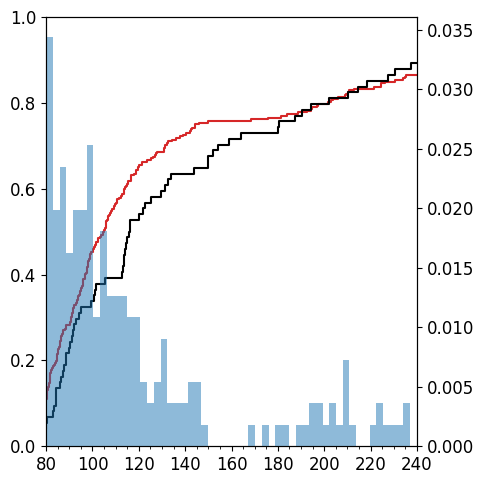

In [74]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))

color = 'tab:red'
ax1.ecdf(df_non_polars['per'], color = color)
ax1.yaxis.tick_left()
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.set_xlim([80,240])

ax1.ecdf(df_polars['per'], color = 'black')
ax1.yaxis.tick_left()
ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax1.set_xlim([80,240])

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.hist(df_non_polars['per'], bins=55, range=(80, 240), density=True, color=color, alpha = 0.5)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.set_xlim([80,240])



fig.tight_layout()

(80.0, 260.0)

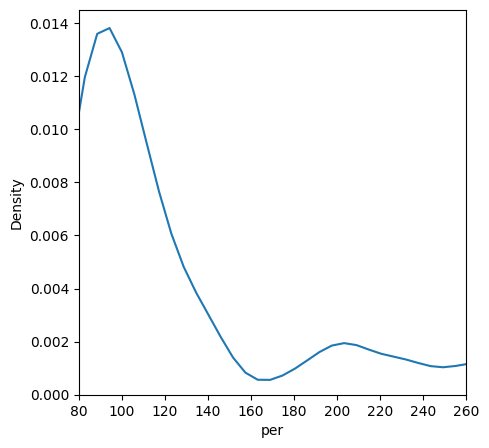

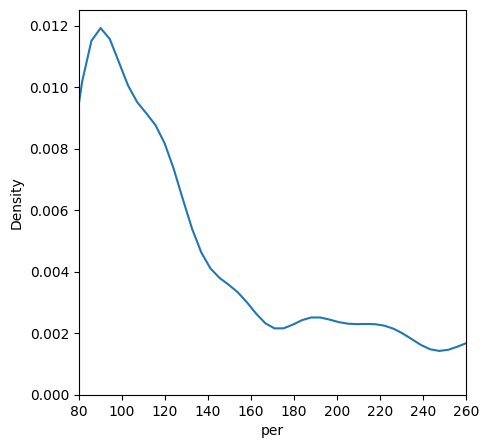

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
sns.kdeplot(data=df_non_polars['per'], ax=ax1, bw_adjust=.25)
ax1.set_xlim((80,260))

fig, ax1 = plt.subplots(1, 1, figsize=(5,5))
sns.kdeplot(data=df_polars['per'], ax=ax1, bw_adjust=.25)
ax1.set_xlim((80,260))


In [9]:
df_non_polars[df_non_polars['per'].between(148,191)], df_polars[df_polars['per'].between(147,191)]

(                        SDSS         per   vtype
 104  SDSSJ075939.78+191417.2  188.544528      NL
 122  SDSSJ081352.02+281317.2  175.680000      NL
 286  SDSSJ123255.10+222209.4  184.046400      NL
 330  SDSSJ143209.77+191403.4  168.624000      NL
 406  SDSSJ162718.38+120434.9  149.760000  SU UMa
 452  SDSSJ214354.60+124457.9  181.440000   Z Cam,
                         SDSS        per  vtype
 24   SDSSJ004213.04+073137.8  154.08000    IP:
 82   SDSSJ072910.68+365838.2  149.76000  Polar
 95   SDSSJ075240.44+362823.2  164.16000  Polar
 140  SDSSJ083750.99+383012.4  180.00000  Polar
 313  SDSSJ132411.57+032050.5  158.71680  Polar
 372  SDSSJ155412.33+272152.4  151.86528  Polar
 374  SDSSJ155538.12+380250.5  149.76000  Polar
 389  SDSSJ161007.50+035232.7  190.54080  Polar
 492  SDSSJ231930.43+261518.6  180.63360  Polar
 503  SDSSJ234502.47+342923.9  187.20000  Polar)

testowanie binningu

array([-964.28302489, -911.24719798, -880.38097322, -870.8542504 ,
       -870.26269914, -867.46041478, -866.83103788, -866.2815361 ,
       -864.7025962 , -869.6439034 , -866.24216867, -864.0157832 ,
       -868.48494633, -870.72378894, -870.13747081, -867.20151398,
       -867.3115443 , -868.87727425, -870.11636218, -869.38893825,
       -872.99617065, -870.57219305, -872.16399708, -864.81181707,
       -869.99198301, -870.43315785, -873.87945267, -876.09016235,
       -875.25583036, -873.04624012, -875.34225875, -873.60576086,
       -875.60064032, -875.34017006, -880.43592406, -875.28306412,
       -878.15868454, -876.56493196, -876.55450836, -878.14841613,
       -876.96920554, -876.04014656, -875.67587116, -879.31816814,
       -877.41552889, -879.39036014, -878.74595368, -876.67482317,
       -877.40065618, -875.15325948, -880.84647989, -878.28921776,
       -882.83046339, -881.93775722, -886.85603753, -886.816597  ,
       -880.75997969, -885.35385724, -885.00959288, -877.58830

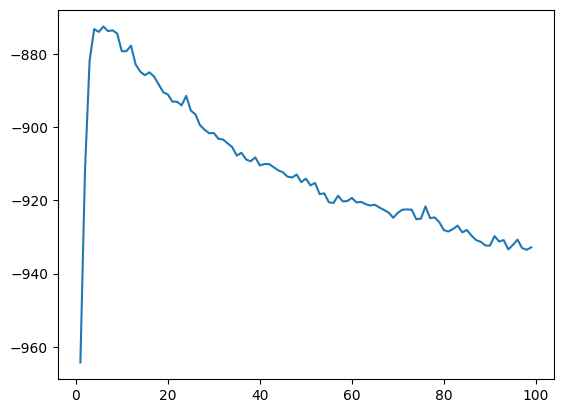

In [10]:
x_rang = df_non_polars[df_non_polars['per'].between(80,240)]
x_rang = x_rang['per']
# V = max(x_rang) - min(x_rang)
V = 240 - 80 #granice przedziału, który nas interesuje
def which_bin(m):
    x_min = 80
    x_max = 240
    DEL = (x_max - x_min)/m
    result = np.floor((x_rang.apply(lambda x: x - x_min)) / DEL - 0)
    return result.values

def n_i(m,i):  
    x_to_bin = which_bin(m)
    return  (x_to_bin == i).sum()

def L(m, alfa):
    sum = 0
    values = np.zeros_like(m, dtype=float)
    for num in m:
        for i in range(num):
            sum += (n_i(num,i) * np.log((n_i(num,i) + alfa - 1) / (V / num * (len(x_rang) +  num*alfa - 1))))
        values[num - 1] = sum
        sum = 0
    return values

ms = np.arange(1, 100, 1)

valL = (L(ms, 10))
plt.plot(ms, valL)
L(ms, 1.1)
# n_i(10, 1), which_bin(10), L(ms, 1.1)
# n_i(1, 0)

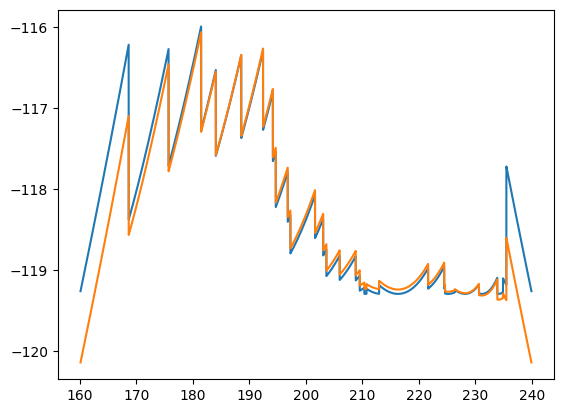

In [43]:


mock_data = pd.DataFrame(np.array([1,2,3,4,5.1,6,7,8,9]))


def logL(split, data, alfa, boundaries):
    N0 = (data < split).sum()
    N1 = (data > split).sum()
    N = N1 + N0 
    delta0 = split - boundaries[0]
    delta1 = boundaries[1] - split
    summand0 = N0 * np.log((N0 + alfa - 1) / (delta0 * (N + 2 * alfa - 1)))
    summand1 = N1 * np.log((N1 + alfa - 1) / (delta1 * (N + 2 * alfa - 1)))
    result = summand0 + summand1
    return float(result)
def logL_values(splits, data, alfa, boundaries):
    result_values = np.zeros(len(splits))
    for i, split in enumerate(splits):
        result_values[i] = logL(split, data, alfa, boundaries)
    return result_values

# range = np.arange(2,8, 0.01)
# bounds = np.array([1.1,8.9])
# logL_values (splits=range, data=mock_data, alfa=2, boundaries=bounds)
# logL(split=3, data=mock_data, alfa=2, boundaries=bounds)
# first_bin_count = df[df < 0].shape[0]
# plt.plot(range, logL_values (splits=range, data=mock_data, alfa=2, boundaries=bounds))
per_min = 160
per_max = 240
x_rang = df_non_polars['per']
x_rang = x_rang[x_rang.between(per_min, per_max)]
period_split = np.arange(per_min + .1, per_max -.1, .01)
period_boundaries = np.array([per_min, per_max])
# logL_values (splits=period_split, data=x_rang, alfa=2, boundaries=period_boundaries)
plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=1.00001, boundaries=period_boundaries))
plt.plot(period_split, logL_values (splits=period_split, data=x_rang, alfa=2, boundaries=period_boundaries))





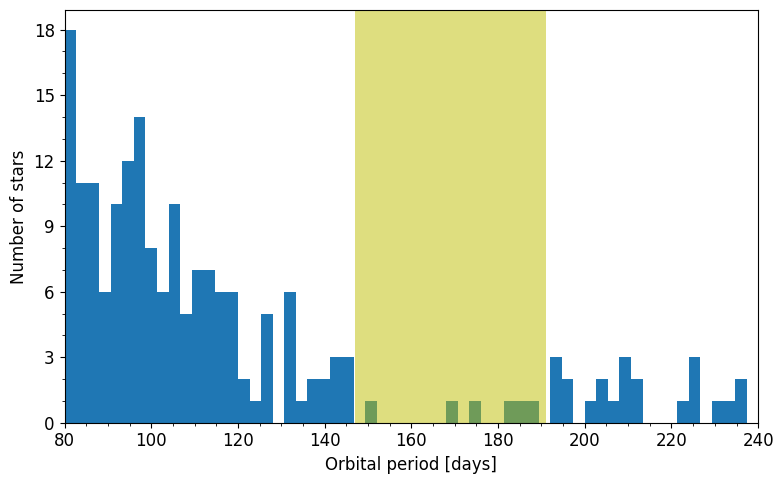

In [75]:
fig, ax2 = plt.subplots(1, 1, figsize=(8,5))

color = 'tab:blue'
ax2.hist(df_non_polars['per'], bins=60, range=(80, 240), density=False, color=color, alpha = 1)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax2.set_xlim([80,240])
ax2.set_xlabel('Orbital period [days]')
ax2.set_ylabel('Number of stars')
ax2.axvspan(147, 191, color='y', alpha=0.5, lw=0)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(3))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.rc('font', size=12)
fig.tight_layout()